In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline
import statsmodels.api as sm
from patsy import dmatrices
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import tree


Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
os.chdir('C:/Users/aura-/MSBA/Data Analytics') 

In [3]:
trees = pd.read_csv('2015_Street_Tree_Census_-_Tree_Data.csv')
trees

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4073900,New York,40.723092,-73.844215,1.027431e+06,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4097300,New York,40.794111,-73.818679,1.034456e+06,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.717581,-73.936608,1.001823e+06,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.713537,-73.934456,1.002420e+06,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,...,3016500,New York,40.666778,-73.975979,9.909138e+05,182202.4260,39.0,165.0,3025654.0,3.010850e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,217978,08/18/2015,25,0,OnCurb,Alive,Good,Quercus palustris,pin oak,...,3051900,New York,40.713211,-73.954944,9.967407e+05,199121.6363,34.0,519.0,3062513.0,3.023690e+09
683784,183795,348185,08/29/2015,7,0,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,...,4070700,New York,40.715194,-73.856650,1.023989e+06,199873.6475,29.0,707.0,4075448.0,4.031810e+09
683785,166161,401670,08/22/2015,12,0,OnCurb,Alive,Good,Acer rubrum,red maple,...,5020100,New York,40.620762,-74.136517,9.463514e+05,165466.0763,50.0,201.0,5011657.0,5.004080e+09
683786,184028,504204,08/29/2015,9,0,OnCurb,Alive,Good,Acer rubrum,red maple,...,2023502,New York,40.850828,-73.903115,1.011054e+06,249271.9507,15.0,23502.0,2007757.0,2.028120e+09


In [4]:


trees['target'] = 0.0
trees['target'][trees['status'] == 'Alive'] = 1.0



In [ ]:
formula = 'target ~ 0 + tree_dbh + curb_loc + borough + latitude + longitude'

Y, X = dmatrices(formula, trees, return_type='dataframe')
y = Y['target'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model = LogisticRegression()
result = model.fit(X_train, y_train)


In [ ]:
prediction_train = model.predict(X_train)
metrics.accuracy_score(y_train, prediction_train)

In [ ]:
prediction = model.predict(X_test)
print(metrics.accuracy_score(y_test, prediction))

In [ ]:
print('Number of positive examples =', len(y_train[y_train==1]))
print('Number of negative examples =', len(y_train[y_train==0]))

In [ ]:
positive_examples_in_test = len(y_test[y_test==1])
total_examples_in_test = len(y_test)
print('Number of examples where baseline is correct =', positive_examples_in_test)
print('Baseline accuracy =', positive_examples_in_test * 1.0 / total_examples_in_test)

In [ ]:
Series(model.coef_[0],index=X.columns.values).sort_values(ascending = False)


In [12]:
alive = trees[trees['status'] == 'Alive']

In [13]:
alive['health_target'] = 0.0
alive['health_target'][alive['health'] == 'Poor'] = 1.0


In [ ]:
formula = 'health_target ~ 0 + tree_dbh + curb_loc + steward + guards + sidewalk + root_grate + \
           root_other + trunk_wire + trnk_light+ trnk_other+ brch_light+ brch_shoe+ brch_other + borough + latitude + longitude'

Y, X = dmatrices(formula, alive, return_type='dataframe')
y = Y['health_target'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model = LogisticRegression()
result = model.fit(X_train, y_train)

In [ ]:
prediction_train = model.predict(X_train)
metrics.accuracy_score(y_train, prediction_train)

In [ ]:
prediction = model.predict(X_test)
print(metrics.accuracy_score(y_test, prediction))

In [ ]:
print('Number of positive examples =', len(y_train[y_train==1]))
print('Number of negative examples =', len(y_train[y_train==0]))

In [ ]:
negative_examples_in_test  = len(y_test[y_test==1])
total_examples_in_test = len(y_test)
print('Number of examples where baseline is correct =', negative_examples_in_test)
print('Baseline accuracy =', negative_examples_in_test * 1.0 / total_examples_in_test)

In [ ]:
Series(model.coef_[0],index=X.columns.values).sort_values(ascending = False)


In [5]:

Y, X = dmatrices('target ~ 0 + tree_dbh + curb_loc + borough + latitude + longitude', trees, return_type='dataframe')
y = Y['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [6]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Create the folds in the training data
kfold = StratifiedKFold(n_splits=3, shuffle=True)

# Iterate over max_depth
for max_depth in [1, 2, 3, 4, 5]:
    test_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    scores = cross_val_score(test_model, X_train, y_train, cv=kfold)
    print('max_depth={} scores={} avg_score={}'.format(max_depth, scores, scores.mean()))

max_depth=1 scores=[0.97909133 0.97943591 0.97946098] avg_score=0.979329407518385
max_depth=2 scores=[0.97966168 0.97931056 0.97901598] avg_score=0.9793294063268033
max_depth=3 scores=[0.97932949 0.97887183 0.9797869 ] avg_score=0.9793294070208014
max_depth=4 scores=[0.97921668 0.97911    0.97963648] avg_score=0.9793210504195616
max_depth=5 scores=[0.97929189 0.97928549 0.97935443] avg_score=0.9793106042162586


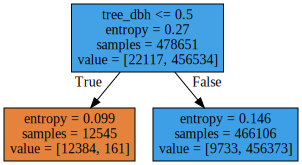

In [7]:
model_status = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1)
result = model_status.fit(X_train, y_train)


import graphviz
graphviz.Source(tree.export_graphviz(model_status,
                                     out_file=None,
                                     feature_names=X.columns.values,
                                     filled=True))

In [9]:
prediction_train = model_status.predict(X_train)
metrics.accuracy_score(y_train, prediction_train)

0.9793294070209819

In [10]:
prediction = model_status.predict(X_test)
print(metrics.accuracy_score(y_test, prediction))

0.979365009725208


In [21]:
formula = 'health_target ~ 0 + tree_dbh + curb_loc + steward + guards + sidewalk + root_grate + \
           root_other + trunk_wire + trnk_light+ trnk_other+ brch_light+ brch_shoe+ brch_other + borough + latitude + longitude'

Y, X = dmatrices(formula, alive, return_type='dataframe')
y = Y['health_target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [22]:
kfold = StratifiedKFold(n_splits=3, shuffle=True)

# Iterate over max_depth
for max_depth in [1, 2, 3, 4, 5]:
    model_health_test = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    scores = cross_val_score(model_health_test, X_train, y_train, cv=kfold)
    print('max_depth={} scores={} avg_score={}'.format(max_depth, scores, scores.mean()))

max_depth=1 scores=[0.95887602 0.95887575 0.95888205] avg_score=0.9588779437570638
max_depth=2 scores=[0.95887602 0.95887575 0.95888205] avg_score=0.9588779437570638
max_depth=3 scores=[0.95887602 0.95887575 0.95888205] avg_score=0.9588779437570638
max_depth=4 scores=[0.95887602 0.95887575 0.95888205] avg_score=0.9588779437570638
max_depth=5 scores=[0.95888259 0.95886918 0.95884263] avg_score=0.9588648007202997


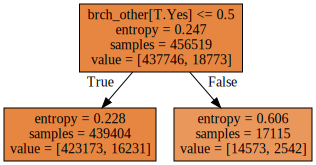

In [23]:
model_health = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1)
result = model_health.fit(X_train, y_train)

graphviz.Source(tree.export_graphviz(model_health,
                                     out_file=None,
                                     feature_names=X.columns.values,
                                     filled=True))